# Assignment 2 - Unsupervised Learning 
`

In [1]:
! git clone https://github.com/Basirulislam/Assignment_2.git


Cloning into 'Assignment_2'...


In [1]:
! git add -A 


The file will have its original line endings in your working directory


In [2]:
! git commit -am "Moving the Jupyter notebook" 


The file will have its original line endings in your working directory
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'Omistaja@DESKTOP-5I0UCPA.(none)')


In [ ]:
! git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [3]:
import pandas as pd

import numpy as np
import mglearn
%matplotlib inline

In [77]:
from sklearn.datasets import load_linnerud

data = load_linnerud()
df_data = pd.DataFrame(data.data, columns=data.feature_names)


# Descriptive statistics of the DataFrame

df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Chins,20.0,9.45,5.286278,1.0,4.75,11.5,13.25,17.0
Situps,20.0,145.55,62.566575,50.0,101.00,122.5,210.00,251.0
Jumps,20.0,70.30,51.277470,25.0,39.50,54.0,85.25,250.0


Some algorithms are very sensitive to the scaling of data such as SVM and NNs, because they aassume that all features are centered around zero and have variance in the same order. We can see that the features in our dataset have mean values that are positive. The std values vary between the features, so that can cause issues in a model as well. 

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_data)
Dataset_scaled = scaler.transform(df_data)

Dataset_scaled = pd.DataFrame(Dataset_scaled)
Dataset_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,20.0,1.776357e-16,1.025978,-1.640004,-0.912192,0.397871,0.737517,1.465329
1,20.0,-2.164935e-16,1.025978,-1.566847,-0.730539,-0.377978,1.056863,1.729189
2,20.0,3.330669e-17,1.025978,-0.906379,-0.616258,-0.326136,0.299125,3.595503


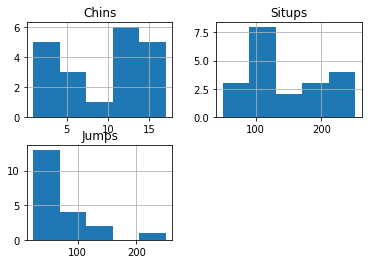

In [79]:
hist_before = df_data.hist(bins=5)

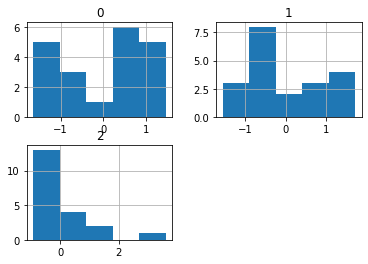

In [80]:
hist_scaled = Dataset_scaled.hist(bins=5)

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [81]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn import datasets
from sklearn.utils import shuffle


data = datasets.fetch_20newsgroups_vectorized(subset='train')
data

{'data': <18846x130107 sparse matrix of type '<class 'numpy.float64'>'
 	with 2895521 stored elements in Compressed Sparse Row format>,
 'target': array([17,  7, 10, ..., 10, 18,  9]),
 'frame': None,
 'target_names': ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 'feature_names': ['00',
  '000',
  '0000',
  '00000',
  '000000',
  '00000000',
  '0000000004',
  '0000000005',
  '00000000b',
  '00000001',
  '00000001b',
  '0000000667',
  '00000010',
  '00000010b',
  '00000011',
  '00000011b',
  '0000001200',
  '00000074',
  '00000093',
  '000000e5',
  '00000100',
  '00000100b',
  '00000101',
  '00000101b',
  

In [60]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

def twenty_newsgroup_to_csv():
    newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out['date'] = pd.to_datetime('now')
    out.to_csv('20_newsgroup.csv')
    
twenty_newsgroup_to_csv()


#### Task 3 (8 points):

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

20 News Groups dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train')
X = data['data']
Y = data['target']

Printing classes and their predictions

In [3]:
Y = data['target']

# some generated clusters
Clusters = Y.copy()
Clusters[:3000] = 3

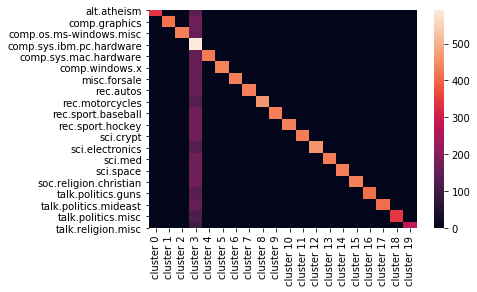

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(Y, Clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])